In [1]:
import sys
sys.path.append('../')

In [2]:
from torchsummary import summary
from models.lenet import LeNet
from library.utils import Utils, DataLoader

In [3]:
net = LeNet().cuda()

summary(net, (1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 6, 28, 28]             156
           Sigmoid-2            [-1, 6, 28, 28]               0
         AvgPool2d-3            [-1, 6, 14, 14]               0
            Conv2d-4           [-1, 16, 10, 10]           2,416
           Sigmoid-5           [-1, 16, 10, 10]               0
         AvgPool2d-6             [-1, 16, 5, 5]               0
            Linear-7                  [-1, 120]          48,120
           Sigmoid-8                  [-1, 120]               0
            Linear-9                   [-1, 84]          10,164
          Sigmoid-10                   [-1, 84]               0
           Linear-11                   [-1, 10]             850
Total params: 61,706
Trainable params: 61,706
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/ba

loss 0.302, train acc 0.888, test acc 0.869
16056.8 examples/sec on cuda:0


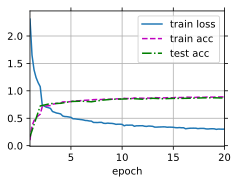

In [4]:
batch_size = 128
train_iter, test_iter = DataLoader().load_data_fashion_mnist(batch_size=batch_size)

lr, num_epochs = 0.8, 20
Utils.train(net, train_iter, test_iter, num_epochs, lr, Utils.try_gpu())